In [3]:
import gzip
import os
import numpy as np

rows = 10000

train_data = os.path.join("..", "data", "mnist", "train-images-idx3-ubyte.gz")
train_labels = os.path.join("..", "data", "mnist", "train-labels-idx1-ubyte.gz")

test_data = os.path.join("..", "data", "mnist", "t10k-images-idx3-ubyte.gz")
test_labels = os.path.join("..", "data", "mnist", "t10k-labels-idx1-ubyte.gz")

In [4]:
def mnist_images(filename):
    with gzip.open(filename, "rb") as file:
        data = np.frombuffer(file.read(), np.uint8, offset = 16)
        return data.reshape(-1, 28, 28) / 255
    
def mnist_labels(filename):
    with gzip.open(filename, "rb") as file:
        return np.frombuffer(file.read(), np.uint8, offset = 8)

X_train = mnist_images(train_data)[:rows]
y_train = mnist_labels(train_labels)[:rows]

X_test = mnist_images(test_data)[:rows]
y_test = mnist_labels(test_labels)[:rows]

print(X_train.shape)

(10000, 28, 28)


7


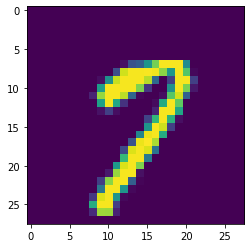

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[-1])
plt.imshow(X_train[-1])
plt.show()

In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train.reshape(-1, 784), y_train)
GaussianNB?

In [7]:
model.score(X_test.reshape(-1, 784), y_test)

0.5738